In [1]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
min_mem_size=30 
run_time=222

In [3]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
# min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

30


In [4]:
h2o.init(strict_version_check=False,max_mem_size=min_mem_size)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\prabh\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\prabh\AppData\Local\Temp\tmp_gqzx1l6
  JVM stdout: C:\Users\prabh\AppData\Local\Temp\tmp_gqzx1l6\h2o_prabh_started_from_python.out
  JVM stderr: C:\Users\prabh\AppData\Local\Temp\tmp_gqzx1l6\h2o_prabh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,"1 year, 9 months and 6 days !!!"
H2O cluster name:,H2O_from_python_prabh_6p4kda
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [5]:
data_path = "data/Amazon_review.csv"

# Load data into H2O
reviews = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
reviews.shape

(48181, 21)

In [7]:
reviews.describe()

Rows:48181
Cols:21




,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,enum,string,enum,enum,string,enum
mins,,,,,,,,,,,,,0.0,0.0,0.0,,NaN,,,NaN,
mean,,,,,,,,,,,,,18689.87867091794,1.4077145669878584,4.565938989855542,,NaN,,,0.0,
maxs,,,,,,,,,,,,,111372787.0,814.0,19.0,,NaN,,,NaN,
sigma,,,,,,,,,,,,,1442754.3578338078,12.529322130002884,0.7621248960567992,,NaN,,,-0.0,
zeros,,,,,,,,,,,,,5858,24386,20,,0,,,0,
missing,0,20137,13393,6777,13505,13528,13408,19490,17441,19697,41820,20079,42222,14660,20284,13527,13537,19683,47374,41844,20080
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,,,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,,,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,,,DaveZ


In [8]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [9]:
target='reviews.rating'

In [10]:
X=get_independent_variables(reviews, target) 
print(X)

['reviews.id', 'reviews.numHelpful', 'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.title', 'reviews.userCity', 'reviews.username', 'reviews.text', 'reviews.userProvince']


In [11]:
# Set target and predictor variables
y = target
y

'reviews.rating'

In [12]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [13]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=reviews)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_0_AutoML_20190313_150235,0.440194,0.663471,0.483206,0.139399
DRF_0_AutoML_20190313_150235,0.472075,0.687077,0.44734,0.144749
XRT_0_AutoML_20190313_150235,1.04506,1.02228,0.876421,0.198397


In [15]:
best_model = h2o.get_model(aml.leaderboard[1,'model_id'])

In [16]:
best_model.algo

'drf'

In [17]:
best_model_param = h2o.get_model(aml.leaderboard[1,'model_id'])

In [18]:
best_model_param.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_0_AutoML_20190313_150235',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_0_AutoML_20190313_150235'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Amazon_review.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Amazon_review.hex'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_validation_Amazon_review.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_validation_Amazon_review.hex'}},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default':

In [19]:
import pandas as pd

In [20]:
reviews_=pd.read_csv("data/Amazon_review.csv")

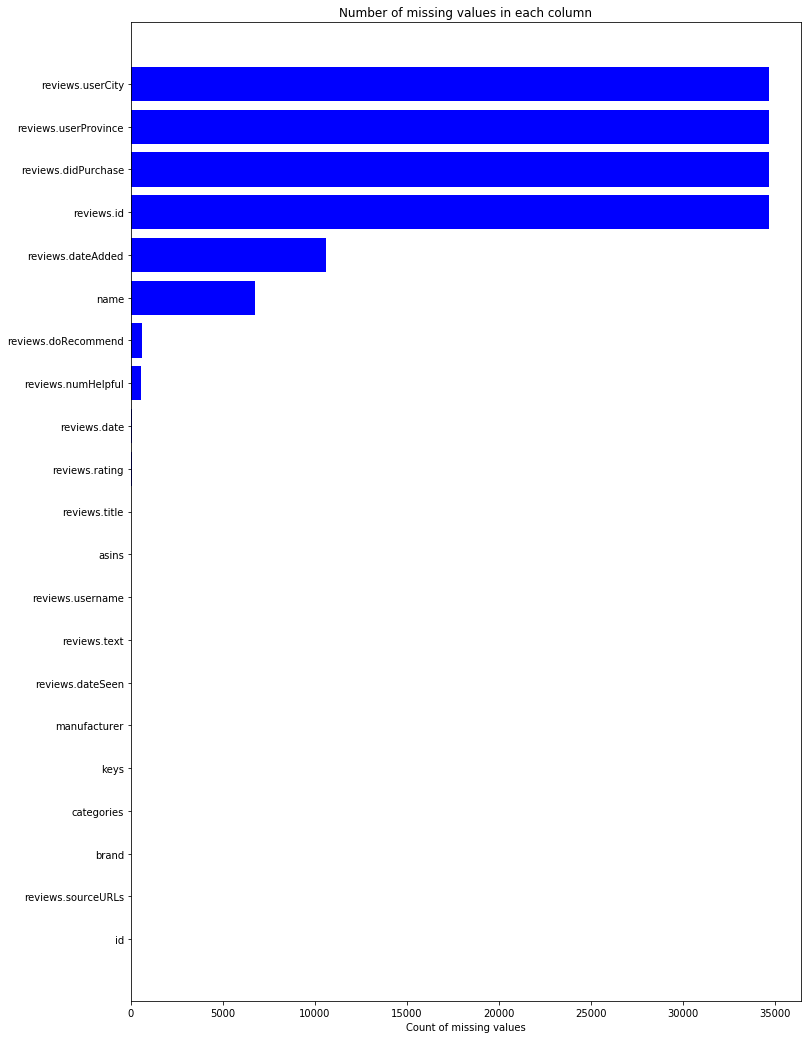

In [21]:
# define the properties missing value variable
properties_missing_df = reviews_.isnull().sum(axis=0).reset_index()
properties_missing_df.columns = ['column_name', 'missing_count']
properties_missing_df = properties_missing_df.ix[properties_missing_df['missing_count']>=0]
properties_missing_df = properties_missing_df.sort_values(by='missing_count')

# set the size and shape of the grapgh
ind = np.arange(properties_missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, properties_missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(properties_missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")

# show the graph
plt.show()

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

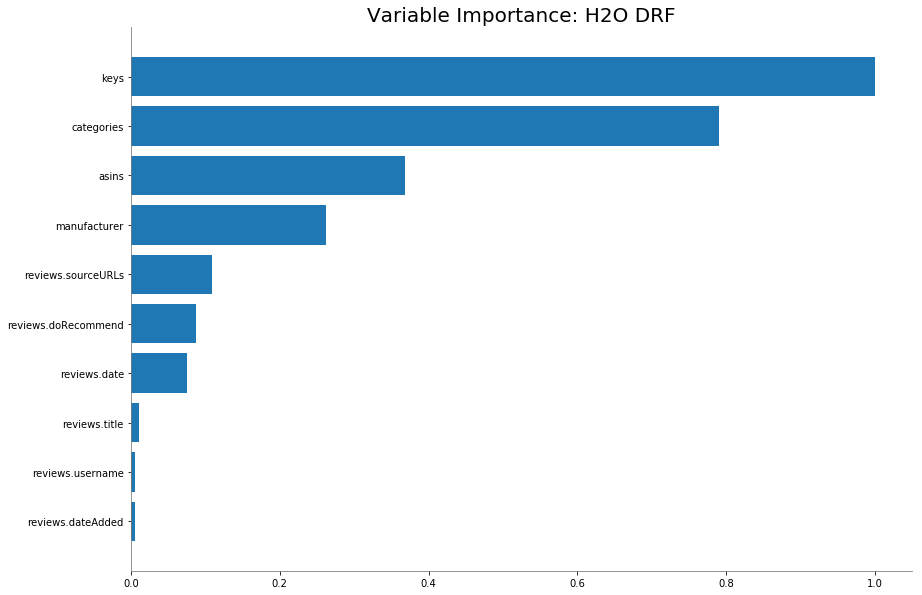

In [23]:
best_model.varimp_plot()

In [24]:
reviews["PositiveReview"] = (reviews["reviews.rating"] >= 4.5).ifelse("1", "0")

In [25]:
reviews.head()

id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,PositiveReview
AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0,5,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,,,Adapter,1
AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0,5,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,,,truman,1
AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0,5,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,,,DaveZ,1
AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",,TRUE,nan,0,4,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME r

In [26]:
reviews["PositiveReview"].table()

PositiveReview,Count
0,29347
1,18834


In [46]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = ['keys', 'categories', 'manufacturer', 'asins', 'reviews.username', 'brand', 'reviews.doRecommend']
response = 'reviews.rating'

gbm_baseline = H2OGradientBoostingEstimator()
gbm_baseline.train(x = predictors, y = response, training_frame = reviews)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
print(str(gbm_baseline.auc(train=True)))

KeyError: 'AUC'

In [40]:
reviews['reviews.rating']<=5

reviews.rating
1
1
1
1
1
1
1
1
1
1


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


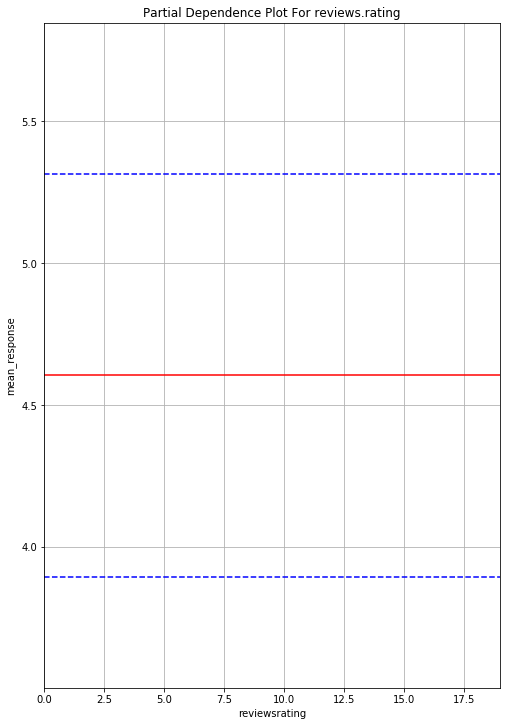

In [34]:
%matplotlib inline  
pdp_helpfulness = gbm_baseline.partial_plot(reviews, cols = ["reviews.rating"])

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


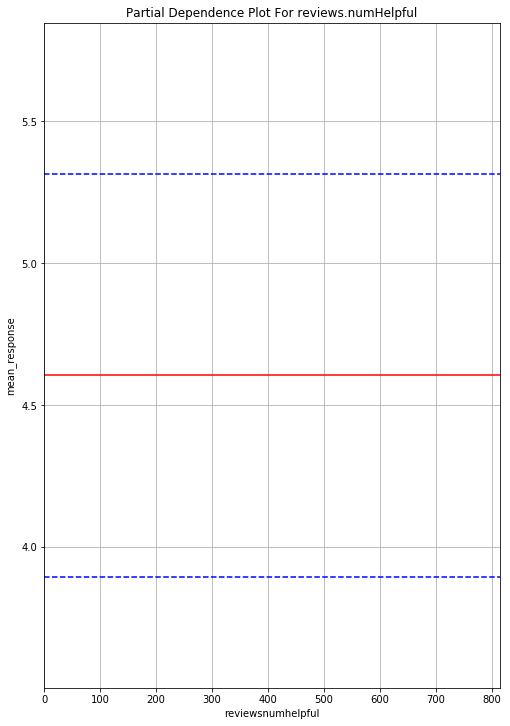

In [36]:
%matplotlib inline  
pdp_helpfulness = gbm_baseline.partial_plot(reviews, cols = ["reviews.numHelpful"])

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


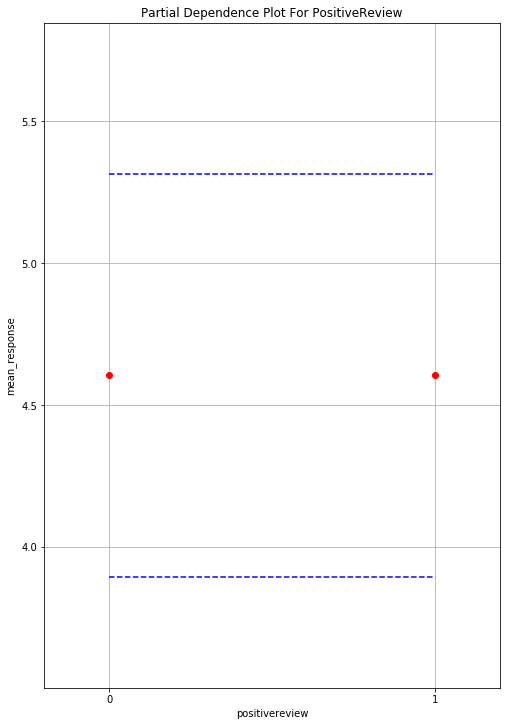

In [41]:
%matplotlib inline  
pdp_helpfulness = gbm_baseline.partial_plot(reviews, cols = ["PositiveReview"])

In [ ]:
reviews["reviews.date"]
# reviews.head()

In [ ]:
# train = reviews[reviews["Train"] == "Yes"]
# test = reviews[reviews["Train"] == "No"]

In [ ]:
# h2o.cluster().shutdown()